In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.50.post1', '1.0.1.post2')

In [4]:
torch.cuda.set_device(0)

In [5]:
!pwd

/home/gaurav/PycharmProjects/nlp-for-hindi/language-model


In [6]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-hindi/language-model')

In [6]:
p = path.glob('HindiWikipediaArticles/*')
files = [x for x in p if x.is_file()]

In [7]:
len(files)

0

In [8]:
train_files, test_files = train_test_split(files, test_size=0.2)

In [9]:
len(train_files), len(test_files)

(44000, 11000)

In [10]:
str(train_files[0]).split('/')[-1][:-4]

'118223'

In [29]:
# Preparing dataset for fastai
for file in train_files:
    with open(file, 'rb') as f:
        text = pickle.load(f)
    with open(path/'HindiDataset'/'train'/(str(file).split('/')[-1][:-4]+'.txt'), "w") as text_file:
        text_file.write(text)

In [30]:
for file in test_files:
    with open(file, 'rb') as f:
        text = pickle.load(f)
    with open(path/'HindiDataset'/'valid'/(str(file).split('/')[-1][:-4]+'.txt'), "w") as text_file:
        text_file.write(text)

In [73]:
from inltk.tokenizer import HindiTokenizer

In [74]:
HindiTokenizer

inltk.tokenizer.HindiTokenizer

In [75]:
# class HindiTokenizer(BaseTokenizer):
#     def __init__(self, lang:str):
#         self.lang = lang
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"hindi_lm.model"))
        
#     def tokenizer(self, t:str) -> List[str]:
#         return self.sp.EncodeAsPieces(t)

In [76]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/hindi_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(30000)]

In [13]:
itos

['<unk>',
 '<s>',
 '</s>',
 '▁के',
 '।',
 '▁में',
 '▁है',
 ',',
 '▁',
 '▁की',
 '▁और',
 '▁से',
 '▁का',
 '▁को',
 '▁हैं',
 '▁एक',
 '▁पर',
 '.',
 '-',
 '▁भी',
 '▁ने',
 '▁किया',
 '▁·',
 '▁यह',
 '▁था',
 '▁लिए',
 '▁इस',
 '▁गया',
 'ों',
 '▁कि',
 'ी',
 '▁जाता',
 '▁जो',
 '▁रूप',
 '▁ही',
 '▁q',
 '▁�',
 '▁कर',
 '▁हो',
 '▁करने',
 '▁तथा',
 '▁नहीं',
 '▁द्वारा',
 '▁या',
 'X',
 '▁थे',
 '▁साथ',
 '▁•',
 'ा',
 '▁भारत',
 '▁होता',
 '▁बाद',
 '▁तक',
 ':',
 '▁"',
 '▁दिया',
 '▁अपने',
 '▁थी',
 '▁हुआ',
 'न',
 '▁कुछ',
 '"',
 '▁जिला',
 '�',
 '▁एवं',
 '▁इसके',
 '▁वे',
 '▁वह',
 '▁|',
 "'",
 '▁नाम',
 '▁जा',
 '▁राज्य',
 '▁समय',
 '▁होती',
 '▁करते',
 '▁हुए',
 '▁तो',
 '▁कई',
 "▁'",
 '▁अन्य',
 '▁अधिक',
 '▁क्षेत्र',
 '▁कारण',
 'े',
 '▁सबसे',
 '▁प्रकार',
 '▁होने',
 'क',
 '▁सकता',
 '▁स्थित',
 'र',
 '▁उनके',
 '▁भारतीय',
 '▁उन्होंने',
 '▁किसी',
 '▁वर्ष',
 '▁जाती',
 '▁वाले',
 '▁बहुत',
 '▁होते',
 '▁करता',
 'ता',
 '▁दो',
 '▁व',
 'ं',
 '▁अपनी',
 '▁कहा',
 '▁पूर्व',
 '▁पहले',
 '▁गए',
 '▁इन',
 '▁हुई',
 '▁जैसे',
 '▁जब',
 '▁ये',
 '▁कम',

In [14]:
# class HindiVocab():
# #     dummy thing
#     def __init__(self, itos:Collection[str]):
#         self.itos = itos
#         self.stoi = collections.defaultdict(int,{v:k for k,v in enumerate(self.itos)})
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"hindi_lm.model"))

#     def numericalize(self, t:Collection[str]) -> List[int]:
#         "Convert a list of tokens `t` to their ids."
#         print(t)
#         return [self.sp.PieceToId(w) for w in t]

# #     Sentence piece has its own separator in tokens i.e _
#     def textify(self, nums:Collection[int], sep='') -> List[str]:
#         "Convert a list of `nums` to their tokens."
#         if isinstance(nums, Text):
#             return nums
#         else:
#             return sep.join([self.sp.IdToPiece(int(i)) for i in nums])

# #     def __getstate__(self):
# #         return {'itos':self.itos}

# #     def __setstate__(self, state:dict):
# #         self.itos = state['itos']
# #         self.stoi = collections.defaultdict(int,{v:k for k,v in enumerate(self.itos)})

#     @classmethod
#     def create(cls, tokens:Tokens, max_vocab:int, min_freq:int) -> 'Vocab':
#         "Create a vocabulary from a set of `tokens`."
#         freq = Counter(p for o in tokens for p in o)
#         itos = [o for o,c in freq.most_common(max_vocab) if c > min_freq]
#         for o in reversed(defaults.text_spec_tok):
#             if o in itos: itos.remove(o)
#             itos.insert(0, o)
#         return cls(itos)

In [13]:
# 30,000 is the vocab size that we chose in sentencepiece
hindi_vocab = Vocab(itos)

In [14]:
tokenizer = Tokenizer(tok_func=HindiTokenizer, lang='hi')

In [15]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [18]:
# data_lm = TextDataBunch.from_folder(path=path/'HindiDataset', tokenizer=tokenizer, vocab=hindi_vocab)

In [19]:
# %debug

In [17]:
data_lm = TextLMDataBunch.from_folder(path=path/'HindiDataset', tokenizer=tokenizer, vocab=hindi_vocab)

In [18]:
data_lm.batch_size

64

In [19]:
data_lm.save()

In [20]:
data_lm.show_batch()

idx,text
0,"▁धातुकर्म ▁की ▁पराकाष्ठा ▁है । ▁यह ▁कथित ▁रूप ▁से ▁राजा ▁चन्द्रगुप्त ▁विक्रमादित्य ▁से ▁निर्माण ▁कराया ▁गया , ▁किंतु ▁कुछ ▁विशेषज्ञों ▁का ▁मानना ▁है ▁कि ▁इसके ▁पहले ▁निर्माण ▁किया ▁गया , ▁संभवतः ▁9 12 ▁ ईपू ▁में । ▁स्तंभ ▁की ▁उँचाई ▁लगभग ▁सात ▁मीटर ▁है ▁और ▁पहले ▁हिंदू ▁व ▁जैन ▁मंदिर ▁का ▁एक ▁हिस्सा ▁था । ▁तेरहवीं ▁सदी ▁में ▁कुतुबुद्दीन ▁ऐबक ▁ने ▁मंदिर ▁को ▁नष्ट ▁करके ▁क़ुतुब ▁मीनार ▁की ▁स्थापना"
1,"▁सकता ▁है । ▁प्रत्येक ▁मामले ▁की ▁परिस्थिति , ▁प्रकृति ▁उद्देश्य ▁तथा ▁शक्ति ▁के ▁विस्तार य ▁को ▁दृष्टिगत ▁रखकर ▁ही ▁न्यायालय ▁अपने ▁न्यायिक ▁विवेक ▁का ▁प्रयोग ▁करेगा । ▁सामान्यत : ▁मामले ▁से ▁प्रत्यक्ष ▁रूप ▁ते ▁सम्बन्धित ▁व्यक्ति ▁ही ▁सर्वोच्च ▁न्यायालय ▁अथवा ▁उच्च ▁न्यायालयों ▁से ▁उनकी ▁शक्ति ▁के ▁प्रयोग ▁की ▁ याचना ▁कर ▁सकता ▁है ▁किंतु ▁यह ▁नियम ▁सर्वथा ▁निर प वाद ▁प्रतीत ▁नहीं ▁होता । ▁संविधान प्र दत्त ▁मूल भूत"
2,"▁जाति ▁के ▁सदस्य ▁समझे ▁जाते ▁हैं । ▁एक - दूसरे ▁से ▁समानता एँ ▁रखने ▁वाली ▁ऐसी ▁भिन्न ▁जातियाँ ▁को , ▁जिनमें ▁जीववैज्ञानिक ों ▁को ▁यह ▁विश्वास ▁हो ▁कि ▁वे ▁अतीत ▁में ▁एक ▁ही ▁पूर्वज ▁से ▁उत्पन्न ▁होकर ▁क्रम - विकास ▁के ▁ज़रिये ▁समय ▁के ▁साथ ▁अलग ▁शाख ों ▁में ▁बंट ▁गई ▁हैं , ▁एक ▁ही ▁जीववैज्ञानिक ▁वंश ▁में ▁डाला ▁जाता ▁है । ▁मसलन ▁घोड़े , ▁गधे ▁और ▁ज़े ब्रा"
3,"▁फफूंद ी ▁और ▁शैवाल ▁में ▁पाए ▁जानेवाले ▁महत्वपूर्ण ▁रंग द्रव्य ▁है । ▁वे ▁फलों ▁और ▁सब्जियों ▁के ▁चमकीले ▁रंग ▁के ▁लिए ▁जिम्मेदार ▁हैं , ▁प्रकाश ▁संश्लेषण ▁में ▁विभिन्न ▁कार्यों ▁का ▁निर्वाह ▁करते ▁हैं ▁और ▁अत्यधिक ▁प्रकाश ▁से ▁होने वाले ▁नुकसान ▁से ▁प्रकाश ▁ संश्लेष क ▁संरचनाओं ▁की ▁रक्षा ▁करते ▁हैं । ▁लाइकोपेन ▁बीटा - कै रोटी न ▁और ▁जे न्थ ो फिल ्स ▁जैसे ▁अनेक ▁महत्वपूर्ण ▁कैरोटीन ॉय ड"
4,"▁जल्दी ▁या ▁विलंब , ▁स्थायी ▁दाँत ▁गिरने ▁पर ▁नकली ▁दाँत ▁न ▁लगाना ▁आदि ▁कारण ▁हैं । ▁दाँतों ▁के ▁रूप - दोष ▁के ▁लिये ▁दंत चिकित्सा ▁में ▁एक ▁अलग ▁शाखा ▁है । ▁यह ▁जुकाम ▁सा ▁ही ▁प्रचलित ▁रोग ▁है । ▁इससे ▁दाँत ▁खोखले ▁हो ▁जाते ▁हैं , ▁उनमें ▁खाना ▁भर ▁जाता ▁है , ▁जिससे ▁दर्द ▁होता ▁है , ▁पानी ▁लगता ▁है । ▁दर्द ▁के ▁कारण ▁दाँत ▁काम ▁नहीं ▁करते ,"


In [47]:
??language_model_learner

In [21]:
len(data_lm.vocab.itos)

30000

In [46]:
data_lm.vocab.stoi

defaultdict(int,
            {'<unk>': 0,
             '<s>': 1,
             '</s>': 2,
             '▁के': 3,
             '।': 4,
             '▁में': 5,
             '▁है': 6,
             ',': 7,
             '▁': 8,
             '▁की': 9,
             '▁और': 10,
             '▁से': 11,
             '▁का': 12,
             '▁को': 13,
             '▁हैं': 14,
             '▁एक': 15,
             '▁पर': 16,
             '.': 17,
             '-': 18,
             '▁भी': 19,
             '▁ने': 20,
             '▁किया': 21,
             '▁·': 22,
             '▁यह': 23,
             '▁था': 24,
             '▁लिए': 25,
             '▁इस': 26,
             '▁गया': 27,
             'ों': 28,
             '▁कि': 29,
             'ी': 30,
             '▁जाता': 31,
             '▁जो': 32,
             '▁रूप': 33,
             '▁ही': 34,
             '▁q': 35,
             '▁�': 36,
             '▁कर': 37,
             '▁हो': 38,
             '▁करने': 39,
             '▁तथा': 40,
          

In [22]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

/home/gaurav/anaconda3/envs/fastai-bleed/lib/python3.6/site-packages/fastai/datasets.py:164: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  with open(fpath, 'r') as yaml_file: return yaml.load(yaml_file)


In [23]:
gc.collect()

49

In [48]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


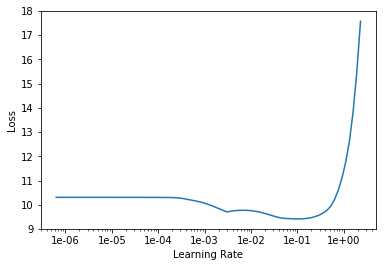

In [49]:
learn.recorder.plot()

In [54]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.583374,4.510166,0.284611


In [57]:
learn.save('first', with_opt=True)

In [58]:
learn.load('first', with_opt=True);

In [59]:
learn.unfreeze()

In [60]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.531020,4.600397,0.273127
2,4.412257,4.545438,0.278273
3,4.289746,4.330606,0.296877
4,3.984632,4.101499,0.320357
5,3.952471,4.020261,0.330837


In [61]:
learn.save('second_hi_lm', with_opt=True)

In [62]:
learn.load('second_hi_lm', with_opt=True);

In [63]:
learn.fit_one_cycle(50, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.795025,4.015812,0.331498
2,3.785783,4.010739,0.332162
3,3.813966,4.005096,0.332968
4,3.794297,3.998023,0.334002
5,3.760452,3.990803,0.335287
6,3.814984,3.980825,0.336857
7,3.740529,3.970397,0.338513
8,3.686065,3.959991,0.340315
9,3.796157,3.944941,0.342453
10,3.693871,3.930822,0.344465


In [64]:
learn.save('third_hi_lm', with_opt=True)

In [25]:
learn.load('third_hi_lm', with_opt=True);

In [10]:
TEXT = "जिसके लिये उन्हें "
N_WORDS = 40
N_SENTENCES = 2

In [11]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

जिसके लिये उन्हें  ▁संयुक्त ▁रूप ▁से ▁सम्मानित ▁किया ▁गया ▁था , ▁वे ▁एक ▁अमेरिकी ▁अभिनेत्री ▁और ▁गायक ▁हैं । ▁वह ▁मूल ▁रूप ▁से ▁अमेरिका ▁में ▁प्रसारित ▁हुआ ▁और ▁विज्ञान ▁के ▁लिए ▁एक ▁नए - न ए ▁मॉडल ▁की ▁स्थापना ▁की । ▁2007 ▁में
जिसके लिये उन्हें  ▁सन ▁1989 ▁में ▁भारत ▁सरकार ▁द्वारा ▁चिकित्सा ▁विज्ञान ▁के ▁क्षेत्र ▁में ▁पद्म ▁भूषण ▁से ▁सम्मानित ▁किया ▁गया ▁था । ▁ये ▁तमिलनाडु ▁से ▁हैं । ▁x x bo s ▁टु म ्यू पल - गुर ा -3 , ▁चौब टाखाल ▁तहसील


In [3]:
np.exp(3.58)

35.87354084706276

In [28]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [65]:
defaults.device = torch.device('cpu')

In [66]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-hindi/language-model')

In [67]:
learn = load_learner(path / 'HindiDataset')

In [68]:
encoder = get_model(learn.model)[0]

In [69]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([30000, 400])

In [84]:
embeddings = encoder.state_dict()['encoder.weight']

In [86]:
embeddings = np.array(embeddings)

In [99]:
embeddings[0].shape

(400,)

In [89]:
df = pd.DataFrame(embeddings)

In [100]:
df[:5000].shape

(5000, 400)

In [101]:
df[:5000].to_csv('embeddings_subset.tsv', sep='\t', index=False, header=False)

In [91]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.683963,-0.014065,0.413372,-0.681373,0.582364,0.638643,0.068949,-0.298156,-0.220711,0.288750,...,-0.238547,-0.119249,0.074624,-0.448258,0.862253,-0.646795,-0.075200,0.744521,0.527758,-0.317910
1,0.014915,0.009034,0.024420,-0.379656,0.026435,0.128204,0.121567,-0.309011,0.002003,0.011906,...,-0.195143,-0.110281,-0.017393,-0.070404,0.110487,-0.321907,0.133643,0.142222,0.239195,0.042972
2,0.014837,0.009602,0.029912,-0.379450,0.022495,0.132940,0.117545,-0.305236,0.002250,0.012698,...,-0.198942,-0.109717,-0.015900,-0.067929,0.106622,-0.319499,0.128395,0.136682,0.249581,0.039835
3,-0.374456,-0.082936,0.074849,-0.364583,0.018105,0.095050,-0.361316,-0.275706,0.044031,0.368841,...,-0.028387,1.485063,0.652316,-0.167599,-0.786172,0.004162,-0.578836,0.203471,0.454663,0.183619
4,0.792413,0.011890,-0.712310,-0.313467,0.695036,1.056837,0.075411,-0.228514,0.127274,0.316206,...,-0.851220,-0.641656,-0.610634,-0.189638,0.617516,-1.024931,0.190676,0.938687,0.464781,0.195361


In [92]:
df.shape

(30000, 400)

In [94]:
df2 = pd.DataFrame(itos)

In [95]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,▁के
4,।


In [102]:
df2[:5000].shape

(5000, 1)

In [103]:
df2[:5000].to_csv('embeddings_metadata_subset.tsv', sep='\t', index=False, header=False)

In [78]:
encoder.state_dict()['encoder.weight'][1]

tensor([ 1.4915e-02,  9.0337e-03,  2.4420e-02, -3.7966e-01,  2.6435e-02,
         1.2820e-01,  1.2157e-01, -3.0901e-01,  2.0034e-03,  1.1906e-02,
         2.2811e-01,  2.0862e-01, -1.2346e-02,  5.4073e-02, -1.7529e-02,
        -3.1509e-02,  2.2457e-01, -1.4691e-01,  1.4890e-02,  1.2859e-01,
         1.3071e-01, -6.8406e-01,  5.8084e-02, -4.2551e-01, -2.5973e-01,
         6.9315e-02, -8.9093e-02, -9.6747e-02, -1.7410e-02, -3.0205e-01,
        -2.8534e-01,  4.2397e-04, -1.0598e-01, -1.6512e-01, -6.6056e-02,
        -2.8381e-01,  9.1200e-02, -3.5589e-02,  6.8012e-02,  7.1850e-02,
         4.8272e-02, -1.5772e-01, -3.1244e-01, -1.1491e-01, -1.1866e-01,
        -1.8148e-01, -8.9795e-02,  3.9411e-01,  1.9570e+00,  2.2895e-01,
         6.6447e-04,  4.9466e-02, -1.3932e-01,  2.3354e-01,  1.0708e-01,
        -8.9544e-02,  8.7860e-02, -2.6048e-01,  3.8343e-02, -2.7675e-01,
        -9.2254e-02,  3.0091e-01,  9.8445e-02,  3.0493e-02, -1.1451e-01,
        -3.4050e-01,  1.9320e-01,  3.4247e-03, -2.9